In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Extracting Data

In [2]:
p = pd.read_csv("Placement_Data_Full_Class.csv")
p_copy = pd.read_csv("Placement_Data_Full_Class.csv")

# Examining the dataset

In [3]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Checking for missing data

In [4]:
p.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Data Cleaning

### Handling Missing Values

In [5]:
p['salary'].fillna(value=0, inplace=True)
p.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

We have successfully removed all null values. 

### Dropping Unwanted Features

In [6]:
p.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True)

We have dropped serial number as we have index as default and we have dropped the boards of school education as we believe it doesn't matter for recruitment

# Data Visualization

## Count Plots

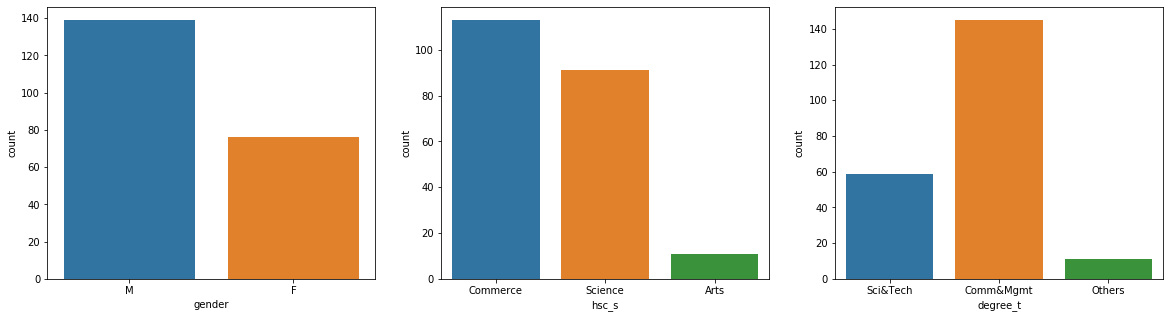

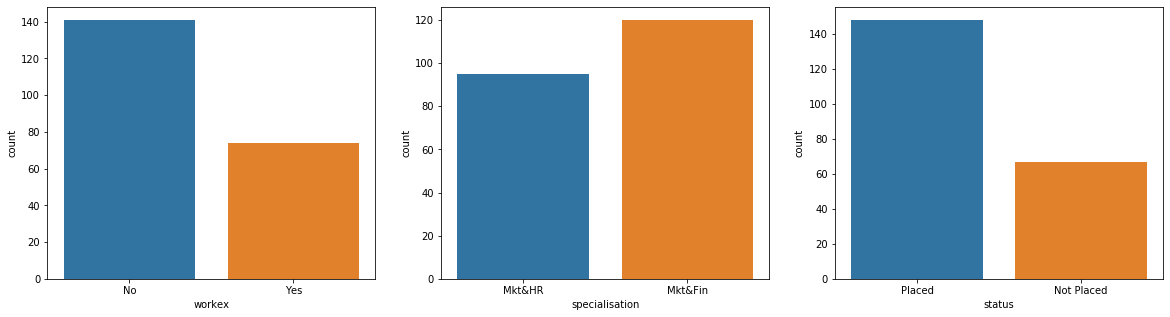

In [7]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sn.countplot(p['gender'], ax = axs[0])
sn.countplot(p['hsc_s'], ax = axs[1])
sn.countplot(p['degree_t'], ax = axs[2])
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sn.countplot(p['workex'], ax = axs[0])
sn.countplot(p['specialisation'], ax = axs[1])
sn.countplot(p['status'], ax = axs[2])

## Dist Plots

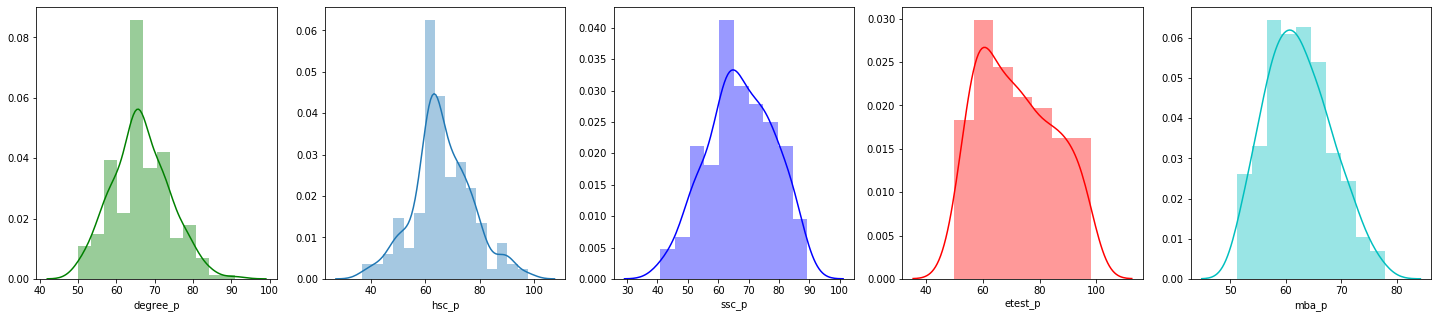

In [8]:
fig, axs = plt.subplots(ncols=5,figsize=(25,5))
sn.distplot(p['degree_p'], ax= axs[0], color = 'g')
sn.distplot(p['hsc_p'], ax= axs[1])
sn.distplot(p['ssc_p'],  ax= axs[2], color = 'b')
sn.distplot(p['etest_p'],  ax= axs[3], color = 'r')
sn.distplot(p['mba_p'],  ax= axs[4], color = 'c')

## Hist Plot

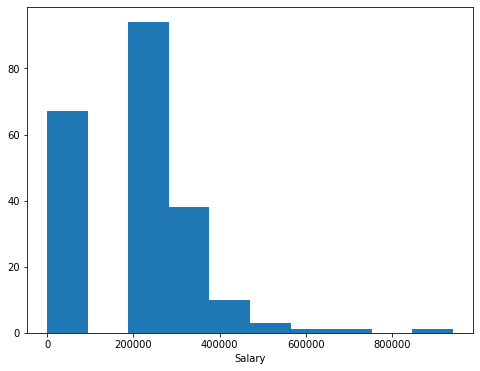

In [9]:
plt.figure(figsize=(8,6))
plt.hist(p['salary'], bins = 10)
plt.xlabel("Salary")
plt.show()

# Feature Engineering

In [10]:
#gender
gen = [1 if x=='M' else 0 for x in p['gender']]
p['gender']=gen

#hsc_s
hsc_A = [1 if x=='Arts' else 0 for x in p['hsc_s']]
p['hsc_s_Arts']=hsc_A
hsc_C = [1 if x=='Commerce' else 0 for x in p['hsc_s']]
p['hsc_s_Com']=hsc_C
hsc_S = [1 if x=='Science' else 0 for x in p['hsc_s']]
p['hsc_s_Sci']=hsc_S

#degree_t
deg_Sci = [1 if x=='Sci&Tech' else 0 for x in p['degree_t']]
p['deg_t_Sci']=deg_Sci
deg_Comm = [1 if x=='Comm&Mgmt' else 0 for x in p['degree_t']]
p['deg_t_Comm']=deg_Comm
deg_Others = [1 if x=='Others' else 0 for x in p['degree_t']]
p['deg_t_Others']=deg_Others

#specialisation
spec = [1 if x=='Mkt&HR' else 0 for x in p['specialisation']]
p['specialisation']=spec

#status
status = [1 if x=='Placed' else 0 for x in p['status']]
p['status'] = status

#workex
WorkEx = [1 if x=='Yes' else 0 for x in p['workex']]
p['workex'] = WorkEx

We derive numerical values from object values as it will be better for training the model

In [11]:
p = p.drop(axis=1, columns=['hsc_s', 'degree_t'])

We drop the rest of the unwanted features as we have alrady derived features from these features. Let us have a look at the data now.

In [12]:
p

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Com,hsc_s_Sci,deg_t_Sci,deg_t_Comm,deg_t_Others
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,1,0,0
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,1,0,0
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,0,1,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0.0,0,0,1,1,0,0
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,1,400000.0,0,1,0,0,1,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,1,275000.0,0,0,1,1,0,0
212,1,67.00,67.00,73.00,1,59.0,0,69.72,1,295000.0,0,1,0,0,1,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,1,204000.0,0,1,0,0,1,0


# Assigning Independent and Dependent Variables

In [13]:
X = p[['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','mba_p','hsc_s_Arts','hsc_s_Com','hsc_s_Sci','deg_t_Sci','deg_t_Comm','deg_t_Others','specialisation']]
y = p['status']

Here X conatains all independent variables and y contains the dependent variable.

# Train & Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

# Machine Learning Models

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\lavanya rajeswari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Accuracy

In [16]:
logreg.score(X_test, y_test)

0.8333333333333334

### Confusion Matrix and Classification Report

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix,"\n")
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[11  6]
 [ 3 34]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.85      0.92      0.88        37

    accuracy                           0.83        54
   macro avg       0.82      0.78      0.80        54
weighted avg       0.83      0.83      0.83        54



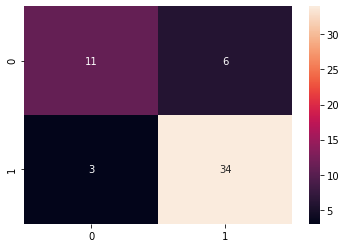

In [18]:
sn.heatmap(confusion_matrix, annot=True)

## KNN Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import math

knn = KNeighborsClassifier(n_neighbors=-1)
#Hyper Parameters Set

params = {'n_neighbors':[math.floor(math.sqrt(X_train.shape[0])), math.ceil(math.sqrt(X_train.shape[0]))],
          'leaf_size':[1,2,3,5], 'p':[1,2],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making model with hyper parameters sets
knn = GridSearchCV(knn, param_grid=params, n_jobs=1)
knn.fit(X_train,y_train)

#knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

### Accuracy

In [20]:
knn.score(X_test,y_test)

0.7777777777777778

### Confusion Matrix and Classification Report

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix,"\n")
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  9]
 [ 3 34]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.79      0.92      0.85        37

    accuracy                           0.78        54
   macro avg       0.76      0.69      0.71        54
weighted avg       0.77      0.78      0.76        54



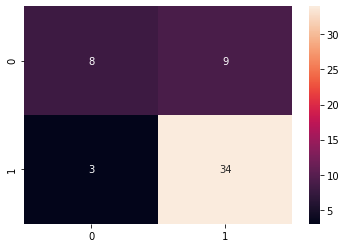

In [22]:
sn.heatmap(confusion_matrix, annot=True)

## Random Forest Classification

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


### Accuracy

In [24]:
metrics.accuracy_score(y_test,y_pred)

0.7407407407407407

### Confusion Matrix and Classification Report

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix,"\n")
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 9  8]
 [ 6 31]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.53      0.56        17
           1       0.79      0.84      0.82        37

    accuracy                           0.74        54
   macro avg       0.70      0.68      0.69        54
weighted avg       0.73      0.74      0.74        54



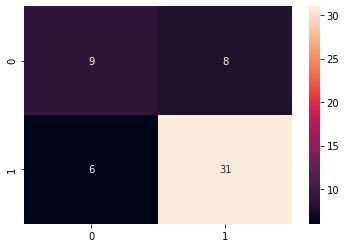

In [26]:
sn.heatmap(confusion_matrix, annot=True)

# Comparing Accuracy of 3 models

We see the best model is **Logistic Regression** with **83%** accuracy, followed by **KNN Classification** with **78%** accuracy and **Random Forest Classifier** with **74%** accuracy.

# Logistic Regression from Scratch

In [27]:
from random import seed
from random import randrange
from csv import reader
from math import exp

### Writing Functions

In [28]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    return coef

# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        yhat = round(yhat)
        predictions.append(yhat)
    return(predictions)

### Making a new CSV file of the customised DataSet

In [29]:
p.to_csv("Placement_Data_Full_Class_LR.csv",header=False)

### Load and Prepare Data

In [30]:
dataset = load_csv("Placement_Data_Full_Class_LR.csv")

for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)

### Normalization

In [31]:
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

### Evaluate Algorithm

In [32]:
n_folds = 5
l_rate = 0.1
n_epoch = 100
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [97.67441860465115, 90.69767441860465, 100.0, 100.0, 100.0]
Mean Accuracy: 97.674%


### Deleting the New File

In [33]:
import os
os.remove("Placement_Data_Full_Class_LR.csv")

# Questions

### 1. To get placed with highest Salary Which Degree should be Opted?

In [34]:
p_copy

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [35]:
status_record = p_copy.status.groupby([p_copy.degree_t])
status_record.value_counts()

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

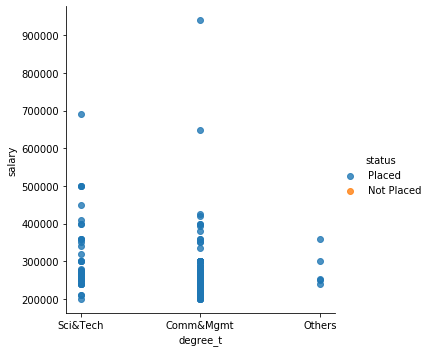

In [36]:
sn.lmplot(x ='degree_t', y ='salary', fit_reg = False, hue = 'status', data = p_copy) 

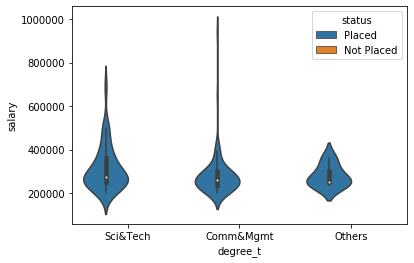

In [37]:
#countplot for above observation
sn.violinplot(x="degree_t", y="salary", data=p_copy, hue='status')

From the above plot, we can say that **Commerce and Management** people are placed with highest salary of all.                    So most people opt for it.

### 2. people with which degree and specialisation are more likely to be placed?

In [38]:
status_record_2 = p_copy.status.groupby([p_copy.degree_t,p_copy.specialisation])
status_record_2.value_counts()
#placed =1 not placed=0 MKT&HR =1 Mkt&Fin =0

degree_t   specialisation  status    
Comm&Mgmt  Mkt&Fin         Placed        68
                           Not Placed    18
           Mkt&HR          Placed        34
                           Not Placed    25
Others     Mkt&Fin         Not Placed     2
                           Placed         2
           Mkt&HR          Not Placed     4
                           Placed         3
Sci&Tech   Mkt&Fin         Placed        25
                           Not Placed     5
           Mkt&HR          Placed        16
                           Not Placed    13
Name: status, dtype: int64

In [39]:
#prob_1 is of people placed, who have degree in comm&mgmt and specialisation in Mkt&Fin
prob_1=68/(68+18)
print("probabability of people placed,who have a degree in comm&mgmt and specialisation in Mkt&Fin",prob_1)
#prob_2 is of people placed , who have degree in comm&mgmt and specialisation in Mkt&HR
prob_2=34/(34+25)
print("probabability of people placed,who have a degree in comm&mgmt and specialisation in Mkt&HR",prob_2)
#prob_3 is of people placed , who have degree in others and specialisation in Mkt&fin
prob_3=2/(2+2)
print("probabability of people placed,who have a degree in others and specialisation in Mkt&Fin",prob_3)
#prob_4 is of people placed , who have degree in others and specialisation in Mkt&HR
prob_4=3/(3+4)
print("probabability of people placed,who have a degree in others and specialisation in Mkt&HR",prob_4)
#prob_5 is of people placed , who have degree in Sci&Tech and specialisation in Mkt&Fin
prob_5=25/(25+5)
print("probabability of people placed,who have a degree in Sci&Tech and specialisation in Mkt&Fin",prob_5)
#prob_6 is of people placed , who have degree in Sci&Tech and specialisation in Mkt&HR
prob_6=16/(16+13)
print("probabability of people placed,who have a degree in Sci&Tech and specialisation in Mkt&HR",prob_6)


probabability of people placed,who have a degree in comm&mgmt and specialisation in Mkt&Fin 0.7906976744186046
probabability of people placed,who have a degree in comm&mgmt and specialisation in Mkt&HR 0.576271186440678
probabability of people placed,who have a degree in others and specialisation in Mkt&Fin 0.5
probabability of people placed,who have a degree in others and specialisation in Mkt&HR 0.42857142857142855
probabability of people placed,who have a degree in Sci&Tech and specialisation in Mkt&Fin 0.8333333333333334
probabability of people placed,who have a degree in Sci&Tech and specialisation in Mkt&HR 0.5517241379310345


In [40]:
max(prob_1,prob_2,prob_3,prob_4,prob_5,prob_6)

0.8333333333333334

#### Therefore, the people with a degree in Sci&Tech and specialisation in Mkt&Fin are most probably placed.

C:\Users\lavanya rajeswari\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\lavanya rajeswari\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


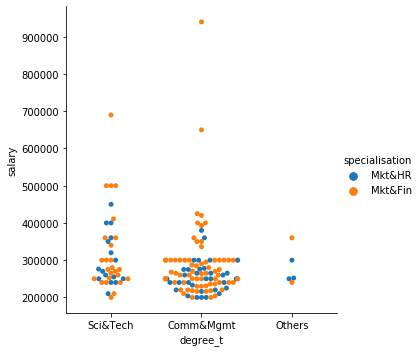

In [41]:
sn.catplot(x="degree_t", y="salary", hue="specialisation", kind="swarm", data=p_copy)
#Mkt&HR is 1 and Mkt&Fin is 0

#### According to this dataset, we can see that the highest salary is of the person, who has a degree in Comm&Mgmt and specialisation in Mkt&Fin.
#### Among people who are not placed, most of them have a specialisation in Mkt&HR.
